In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/petrol-price-forecasting/sample_submission.csv
/kaggle/input/petrol-price-forecasting/train_data.csv
/kaggle/input/petrol-price-forecasting/test_data.csv


In [46]:
print(test_data)

            Prediction  Prediction_SARIMA
Date                                     
2019-01-01         NaN                NaN
2019-01-02         NaN                NaN
2019-01-03         NaN                NaN
2019-01-04         NaN                NaN
2019-01-05         NaN                NaN
2019-01-06         NaN                NaN
2019-01-07         NaN                NaN
2019-01-08         NaN                NaN
2019-01-09         NaN                NaN
2019-01-10         NaN                NaN
2019-01-11         NaN                NaN
2019-01-12         NaN                NaN
2020-01-01         NaN                NaN
2020-01-02         NaN                NaN
2020-01-03         NaN                NaN
2020-01-04         NaN                NaN


In [47]:
test_data['Prediction_SARIMA'] = result_sarima.predict(test_data)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

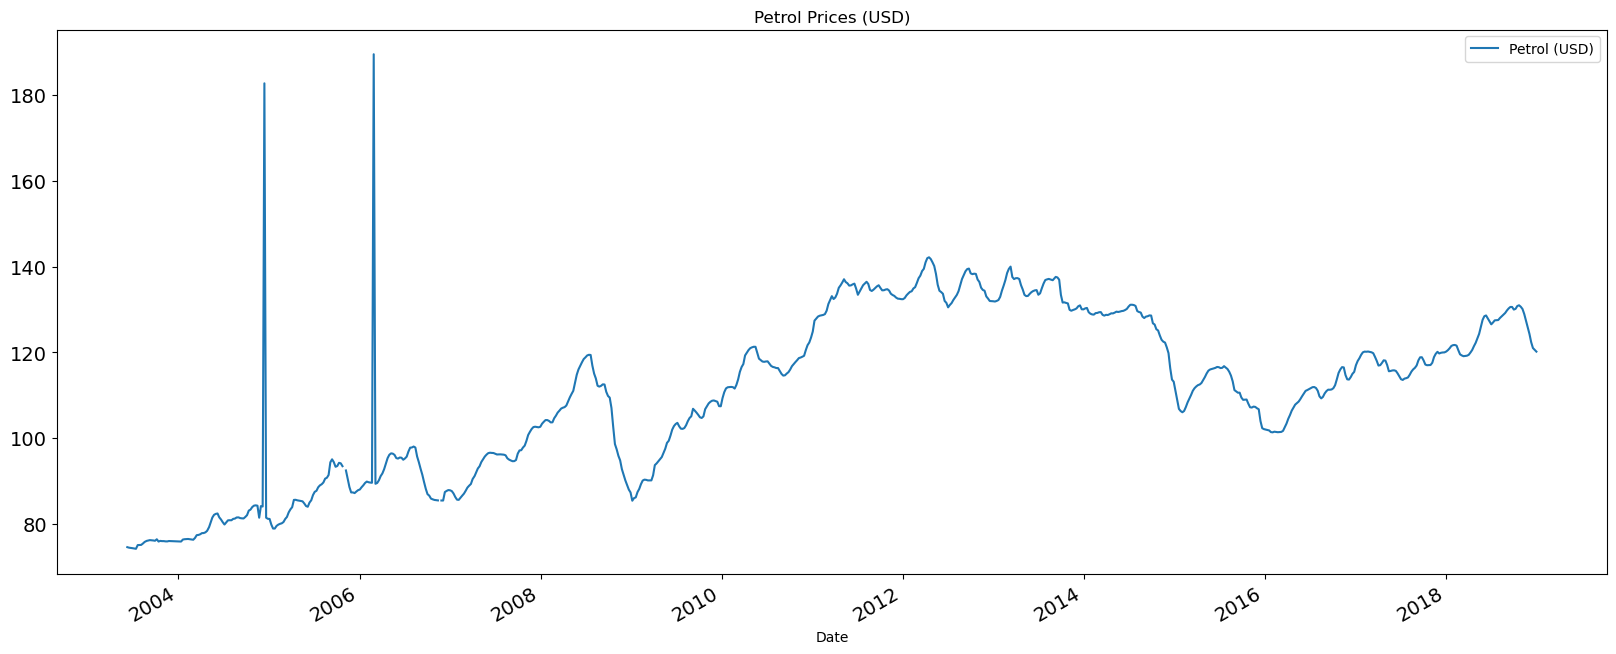

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29145D+00    |proj g|=  7.16761D-02


 This problem is unconstrained.



At iterate    5    f=  3.16959D+00    |proj g|=  1.83550D-01

At iterate   10    f=  3.13665D+00    |proj g|=  1.37264D-02

At iterate   15    f=  3.13633D+00    |proj g|=  2.50550D-02

At iterate   20    f=  3.13629D+00    |proj g|=  6.56574D-04

At iterate   25    f=  3.13628D+00    |proj g|=  1.39138D-02

At iterate   30    f=  3.13613D+00    |proj g|=  3.45728D-03

At iterate   35    f=  3.13612D+00    |proj g|=  2.90033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     47      1     0     0   3.135D-05   3.136D+00
  F =   3.1361195164629123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the train and test data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/test_data.csv')

# Convert the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Set 'Date' column as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

# Plot the time series data
train_data.plot(figsize=(20,8), title= 'Petrol Prices (USD)', fontsize=14)
plt.show()

# SARIMA Model
model_sarima = SARIMAX(train_data, order=(2,1,1), seasonal_order=(1,1,1,12), trend='c')
result_sarima = model_sarima.fit()
print(result_sarima.summary())

# Make predictions on the test data
test_data['Prediction_SARIMA'] = result_sarima.predict(start=test_data.index[0], end=test_data.index[-1])

# ARIMA Model
model_arima = ARIMA(train_data, order=(2,1,1))
result_arima = model_arima.fit()
print(result_arima.summary())



In [ ]:

# Make predictions on the test data
test_data['Prediction_ARIMA'] = result_arima.predict(start=test_data.index[0], end=test_data.index[-1])

# Save the predicted values to a new file
test_data[['Prediction_SARIMA', 'Prediction_ARIMA']].to_csv('predictions.csv')

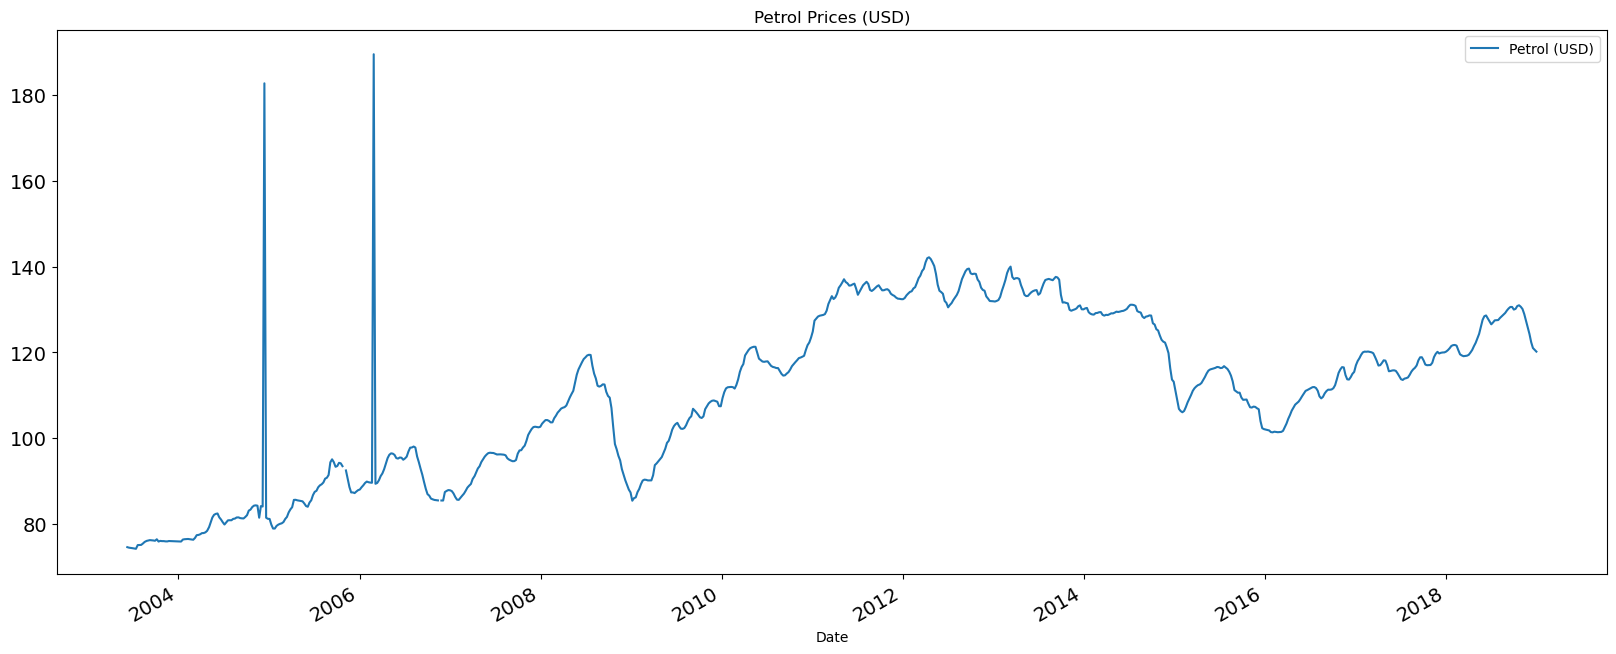

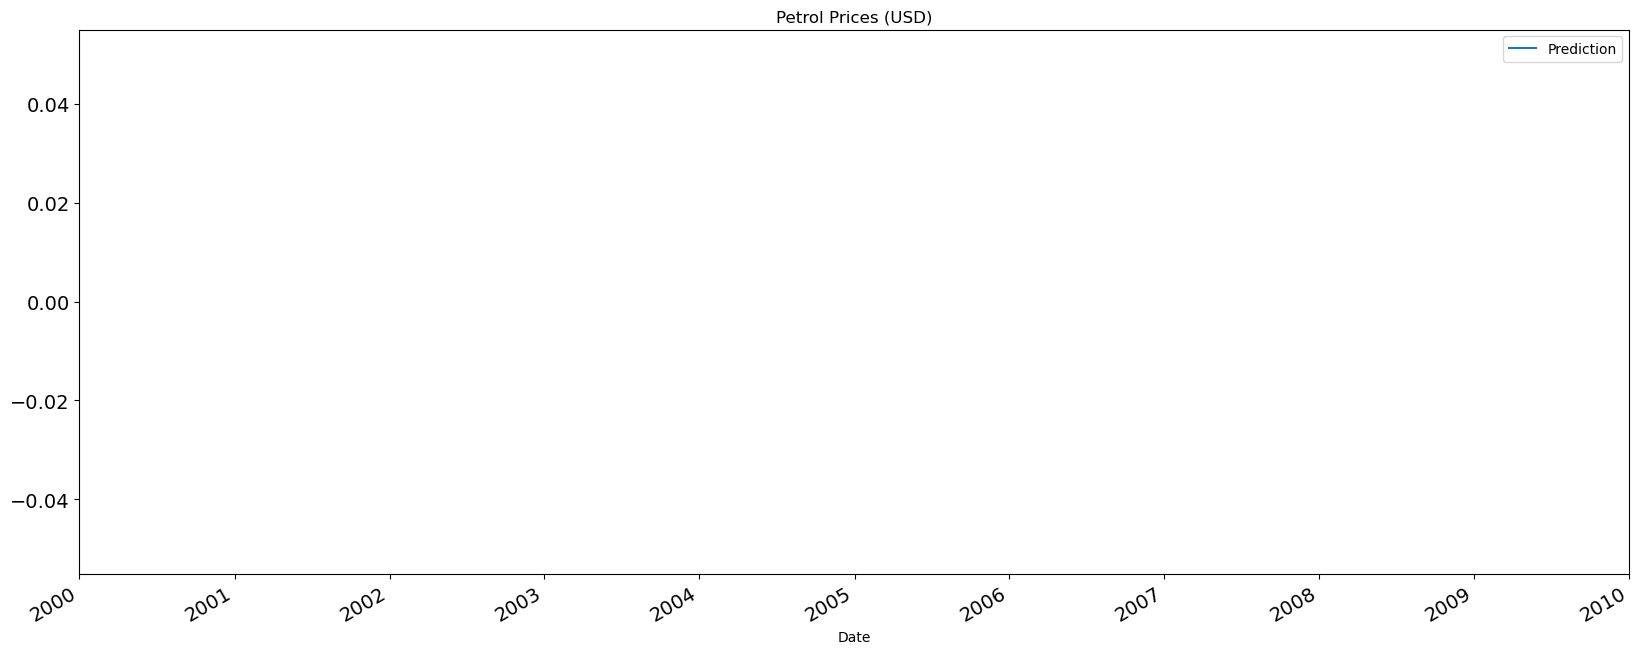

In [39]:
train_data.plot(figsize=(20,8), title= 'Petrol Prices (USD)', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Petrol Prices (USD)', fontsize=14)
plt.show()

In [41]:
print(train_data)

            Petrol (USD)
Date                    
2003-06-09         74.59
2003-06-16         74.47
2003-06-23         74.42
2003-06-30         74.35
2003-07-07         74.28
...                  ...
2018-12-03        124.30
2018-12-10        122.37
2018-12-17        121.02
2018-12-24        120.61
2018-12-31        120.18

[813 rows x 1 columns]


In [40]:
test_data['Prediction_ARIMA']

KeyError: 'Prediction_ARIMA'

KeyError: 'Petrol (USD)'

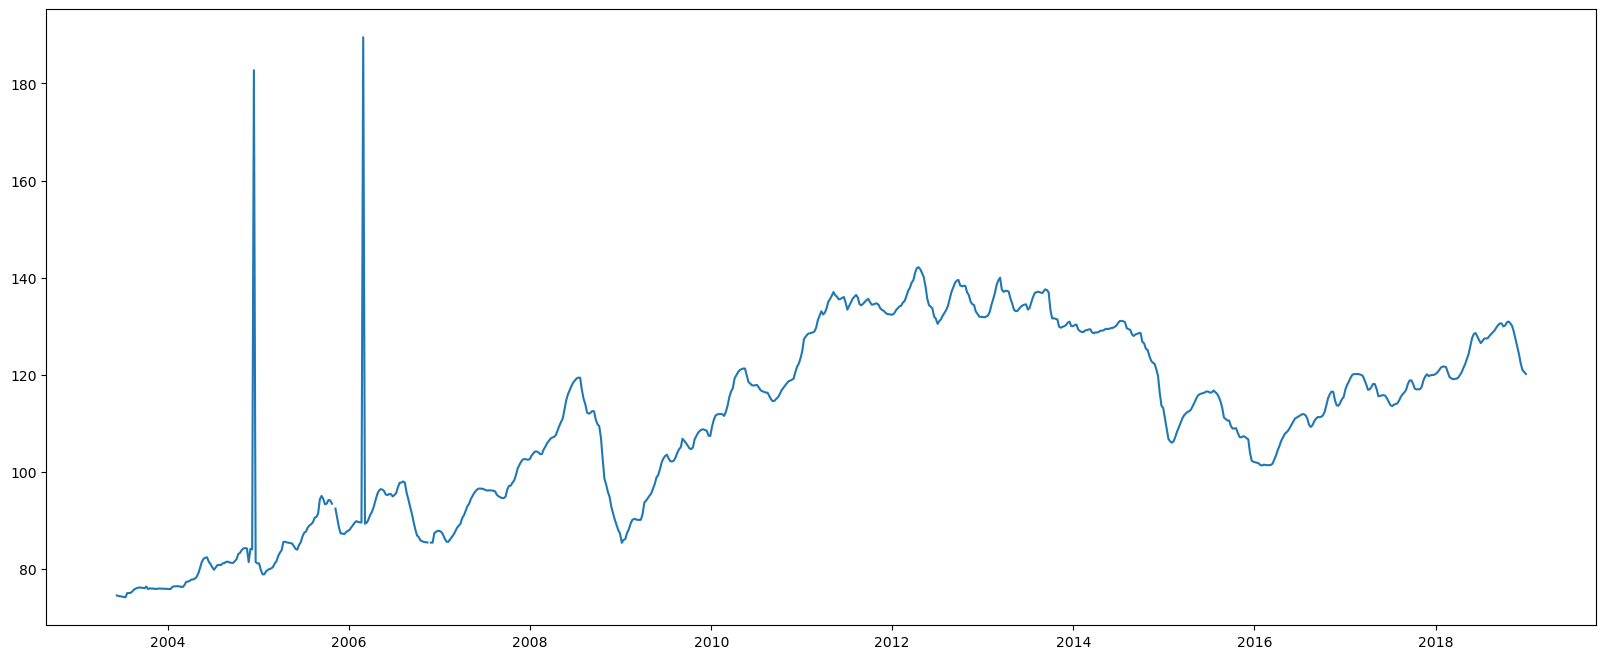

In [42]:
# # Plot the actual and predicted values for SARIMA
# plt.figure(figsize=(20,8))
# # plt.plot(train_data.index, train_data['Petrol (USD)'], label='Train Data')
# plt.plot(test_data.index, test_data['Petrol (USD)'], label='Test Data')
# plt.plot(test_data.index, test_data['Prediction_SARIMA'], label='SARIMA Predictions')
# plt.title('Petrol Prices (USD) - SARIMA Predictions')
# plt.xlabel('Date')
# plt.ylabel('Petrol Prices (USD)')
# plt.legend()
# plt.show()

# Plot the actual and predicted values for ARIMA
plt.figure(figsize=(20,8))
plt.plot(train_data.index, train_data['Petrol (USD)'], label='Train Data')
plt.plot(test_data.index, test_data['Petrol (USD)'], label='Test Data')
plt.plot(test_data.index, test_data['Prediction_ARIMA'], label='ARIMA Predictions')
plt.title('Petrol Prices (USD) - ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Petrol Prices (USD)')
plt.legend()
plt.show()


In [32]:
train_data

,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
...,...
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02


In [33]:
test_data

,Petrol (USD),Prediction_HOLT
Date,,
2003-06-09,74.59,75.042654
2003-06-16,74.47,75.351966
2003-06-23,74.42,75.499340
2003-06-30,74.35,75.662497
2003-07-07,74.28,75.839071
...,...,...
2018-12-03,124.30,NaN
2018-12-10,122.37,NaN
2018-12-17,121.02,NaN


In [19]:
from statsmodels.tsa.api import ExponentialSmoothing

In [20]:
# Load the train and test data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')

# Convert the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Set 'Date' column as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)
# create holt-winters method model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
results = model.fit()

# make forecast for test data
forecast = results.forecast(steps=len(test_data))
test_data['Prediction_HOLT']= results.predict(start=test_data.index[0], end=test_data.index[-1])




/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [21]:
test_data

,Petrol (USD),Prediction_HOLT
Date,,
2003-06-09,74.59,75.042654
2003-06-16,74.47,75.351966
2003-06-23,74.42,75.499340
2003-06-30,74.35,75.662497
2003-07-07,74.28,75.839071
...,...,...
2018-12-03,124.30,NaN
2018-12-10,122.37,NaN
2018-12-17,121.02,NaN


KeyError: 'Petrol (USD)'

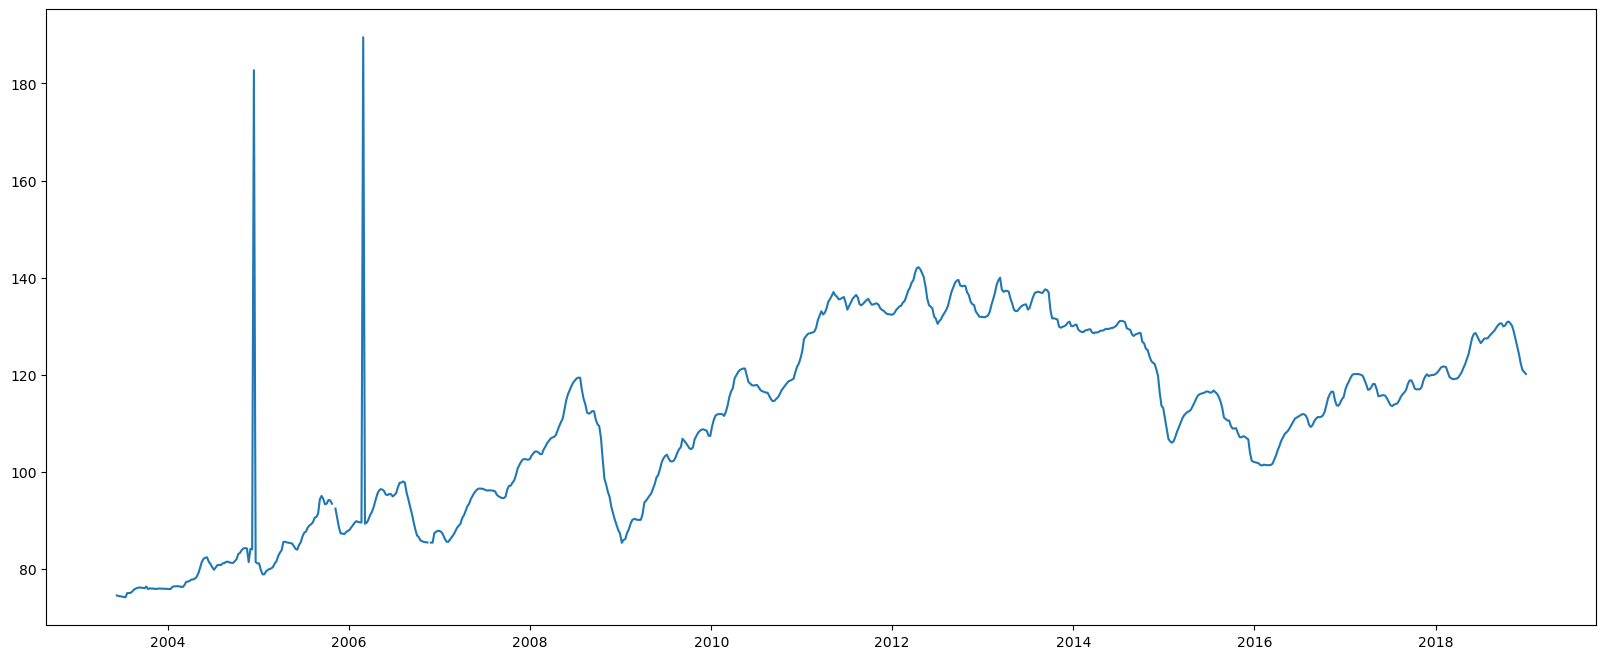

In [48]:
plt.figure(figsize=(20,8))
plt.plot(train_data.index, train_data['Petrol (USD)'].values, label='Train Data')
plt.plot(test_data.index, test_data['Petrol (USD)'], label='Test Data')
# plt.plot(test_data.index, test_data['Prediction_HOLT'], label='HOLT Predictions')
# plt.title('Petrol Prices (USD) - HOLT Predictions')
plt.xlabel('Date')
plt.ylabel('Petrol Prices (USD)')
plt.legend()
plt.show()

In [ ]:
test_data

In [ ]:
# Load the train and test data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')

# Convert the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Set 'Date' column as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

# create exponential smoothing model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
results = model.fit()

# make forecast for test data
forecast = results.forecast(steps=len(test_data))

# plot actual vs predicted values
plt.plot(train_data, label='Actual')
plt.plot(test_data, forecast, label='Predicted')
plt.legend()
plt.show()

# # evaluation metrics for Holt-Winters method
# print("Holt-Winters Evaluation Metrics:")
# print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))
# print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((test_data['Prediction'] - forecast) / test_data['Prediction'])) * 100)
# print("Mean Squared Error (MSE):", mean_squared_error(test_data['Prediction'], forecast))
# print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)))
# print("R-Squared (R2):", r2_score(test_data['Prediction'], forecast))

In [ ]:

# create exponential smoothing model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
results = model.fit()

# make forecast for test data
forecast = results.forecast(steps=len(test_data))

# plot actual vs predicted values
plt.plot(train_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()

# evaluation metrics for Exponential Smoothing
print("Exponential Smoothing Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((test_data['Prediction'] - forecast) / test_data['Prediction'])) * 100)
print("Mean Squared Error (MSE):", mean_squared_error(test_data['Prediction'], forecast))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)))
print("R-Squared (R2):", r2_score(test_data['Prediction'], forecast))

In [4]:
# plot the forecast
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['Petrol (USD)'], label='Training')
plt.plot(test_data.index, test_data['Prediction'])
plt.plot(test_data.index, forecast, label='SARIMA Forecast',color='orange')

plt.legend()
plt.title('SARIMA Forecast for Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

NameError: name 'plt' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv', parse_dates=['Date'], index_col='Date')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/test_data.csv', parse_dates=['Date'], index_col='Date')
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


In [6]:
print(test_data)

            Prediction
Date                  
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
2019-01-06         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-12         NaN
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN


In [7]:
# fit and predict using SARIMA
model = SARIMAX(train_data['Petrol (USD)'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
result = model.fit()
forecast = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36642D+00    |proj g|=  3.32811D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.34159D+00    |proj g|=  6.92611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   1.654D-06   3.341D+00
  F =   3.3413927536976087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


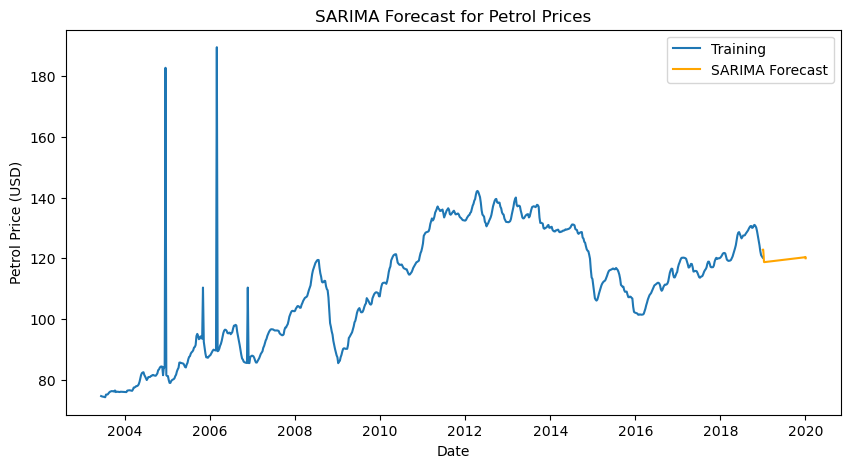

In [8]:
# plot the forecast
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['Petrol (USD)'], label='Training')
plt.plot(test_data.index, test_data['Prediction'])
plt.plot(test_data.index, forecast, label='SARIMA Forecast',color='orange')

plt.legend()
plt.title('SARIMA Forecast for Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

In [9]:
print("NaN values in test_data: ", test_data.isna().sum())
print("Infinite values in test_data: ", np.isinf(test_data).sum())

NaN values in test_data:  Prediction    16
dtype: int64
Infinite values in test_data:  Prediction    0
dtype: int64


In [10]:
test_data.fillna(test_data.mean(), inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.dropna(inplace=True)

In [11]:
print(train_data.isna().sum())

Petrol (USD)    0
dtype: int64


In [12]:
print(len(test_data['Prediction']))
print(len(forecast))


0
16


In [13]:
# evaluation metrics for SARIMA
print("SARIMA Evaluation Metrics:")
# print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((test_data['Prediction'] - forecast) / test_data['Prediction'])) * 100)
print("Mean Squared Error (MSE):", mean_squared_error(test_data['Prediction'], forecast))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)))
print("Akaike Information Criterion (AIC):", result.aic)
print("R-Squared (R2):", r2_score(test_data['Prediction'], forecast))
print("Normalized Root Mean Squared Error (NRMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)) / (test_data['Prediction'].max() - test_data['Prediction'].min()))
print("Weighted Absolute Percentage Error (WAPE):", np.sum(np.abs(test_data['Prediction'] - forecast)) / np.sum(np.abs(test_data['Prediction'] - test_data['Prediction'].mean())))
print("Weighted Mean Absolute Percentage Error (WMAPE):", np.sum(np.abs(test_data['Prediction'] - forecast)) / np.sum(np.abs(test_data['Prediction'])))

SARIMA Evaluation Metrics:
Mean Absolute Percentage Error (MAPE): nan


ValueError: Found input variables with inconsistent numbers of samples: [0, 16]

In [ ]:
# fit and predict using ARIMA
model = ARIMA(train_data['Petrol (USD)'], order=(1, 1, 1))
result = model.fit()
forecast = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

In [ ]:


# plot the forecast
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['Petrol (USD)'], label='Training')
plt.plot(test_data.index, test_data['Prediction'])
plt.plot(test_data.index, forecast, label='ARIMA Forecast',color='orange')
plt.legend()
plt.title('ARIMA Forecast for Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

# evaluation metrics for ARIMA
print("ARIMA Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))


In [ ]:
# evaluation metrics for SARIMA
print("SARIMA Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((test_data['Prediction'] - forecast) / test_data['Prediction'])) * 100)
print("Mean Squared Error (MSE):", mean_squared_error(test_data['Prediction'], forecast))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)))
print("Akaike Information Criterion (AIC):", result.aic)
print("R-Squared (R2):", r2_score(test_data['Prediction'], forecast))
print("Normalized Root Mean Squared Error (NRMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)) / (test_data['Prediction'].max() - test_data['Prediction'].min()))
print("Weighted Absolute Percentage Error (WAPE):", np.sum(np.abs(test_data['Prediction'] - forecast)) / np.sum(np.abs(test_data['Prediction'] - test_data['Prediction'].mean())))
print("Weighted Mean Absolute Percentage Error (WMAPE):", np.sum(np.abs(test_data['Prediction'] - forecast)) / np.sum(np.abs(test_data['Prediction'])))

In [ ]:
print(test_data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# read data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/test_data.csv')

# convert Date column to datetime object and set as index
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.set_index('Date', inplace=True)

# create exponential smoothing model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
results = model.fit()

# make forecast for test data
forecast = results.forecast(steps=len(test_data))

# plot actual vs predicted values
plt.plot(train_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()

# evaluation metrics for Exponential Smoothing
print("Exponential Smoothing Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(test_data['Prediction'], forecast))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((test_data['Prediction'] - forecast) / test_data['Prediction'])) * 100)
print("Mean Squared Error (MSE):", mean_squared_error(test_data['Prediction'], forecast))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(test_data['Prediction'], forecast)))
print("R-Squared (R2):", r2_score(test_data['Prediction'], forecast))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the train and test data
train_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')
test_data = pd.read_csv('/kaggle/input/petrol-price-forecasting/train_data.csv')

# Convert the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Set 'Date' column as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

# Split the data into features and target
X = train_data.drop(columns=['Petrol (USD)'])
y = train_data['Petrol (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train

In [ ]:
#Random Forest Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:

# Make predictions on the test data
test_data['Prediction_RF'] = model.predict(scaler.transform(test_data.drop(columns=['Date'])))

# Plot the feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='g', align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Save the predicted values to a new file
test_data[['Date', 'Prediction_RF']].to_csv('predictions.csv', index=False)


In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# KNN Regressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Decision Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

# XGBoost Regressor
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

# Plot the results
plt.figure(figsize=(20,8))
plt.plot(train_data.index, train_data['Petrol (USD)'], label='Train')
plt.plot(test_data['Date'], y_pred_rf, label='Random Forest')
plt.plot(test_data['Date'], y_pred_knn, label='KNN')
plt.plot(test_data['Date'], y_pred_dtr, label='Decision Tree')
plt.plot(test_data['Date'], y_pred_xgb, label='XGBoost')
plt.title('Petrol Prices (USD) Prediction')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.legend()
plt.show()

# Evaluation metrics
print('Random Forest Regressor Evaluation Metrics:')
print('Mean Absolute Error (MAE):', mean_absolute_error(test_data['Prediction'], y_pred_rf))
print('Mean Squared Error (MSE):', mean_squared_error(test_data['Prediction'], y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(test_data['Prediction'], y_pred_rf)))
print('R-Squared (R2):', r2_score(test_data['Prediction'], y_pred_rf))

print('KNN Regressor Evaluation Metrics:')
print('Mean Absolute Error (MAE):', mean_absolute_error(test_data['Prediction'], y_pred_knn))
print('Mean Squared Error (MSE):', mean_squared_error(test_data['Prediction'], y_pred_k))